In [1]:
# Time Series Basics
# Statsmodels Python Library
# ETS Models and Decomposition
# EWMA Models
# ARIMA Models

# Time Series Basics

In [2]:
# Trends:   'Upward' , 'Horizontal/Stationary', 'Downward'

# Seasonality - Repeating Trends

# Cyclical - Trends with no set repetition



# Statsmodels Libary

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import statsmodels.api as sm

/Users/vmueller/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
df = sm.datasets.macrodata.load_pandas().data

In [9]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [10]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [12]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [13]:
df.index = index

In [14]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


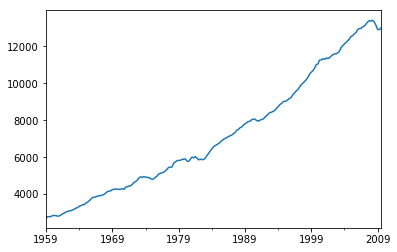

In [15]:
df['realgdp'].plot()

In [22]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [23]:
df['trend'] = gdp_trend

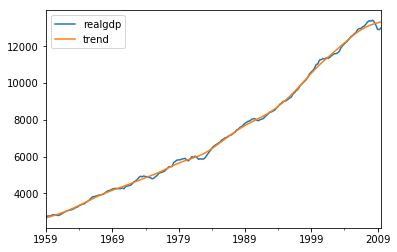

In [24]:
df[['realgdp', 'trend']].plot()

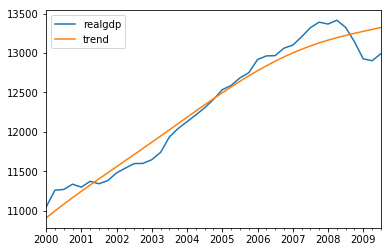

In [26]:
df[['realgdp', 'trend']]["2000-03-31":].plot()

# ETS Models - Error Trend Seasonality

### Exponential Smoothing
### Trend Methods Models
### ETS Decomposition

In [27]:
# EWMA - Exponential Weighted Moving Averages

# Basic SMA has some weaknesses 
# smaller windows will lead to more noise, rather then signal

# EWMA - will allow us to reduce the lag effect from SMA and it will put more weight on values
# that occured more recently (by applying more weight to the more recent values, thus the name)

# The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA 
# and the number of periods given a window size

In [28]:
airline = pd.read_csv('airline_passengers.csv', index_col="Month")

In [32]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [34]:
airline.dropna(inplace=True)

In [36]:
airline.index = pd.to_datetime(airline.index)

In [37]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [38]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [40]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [41]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

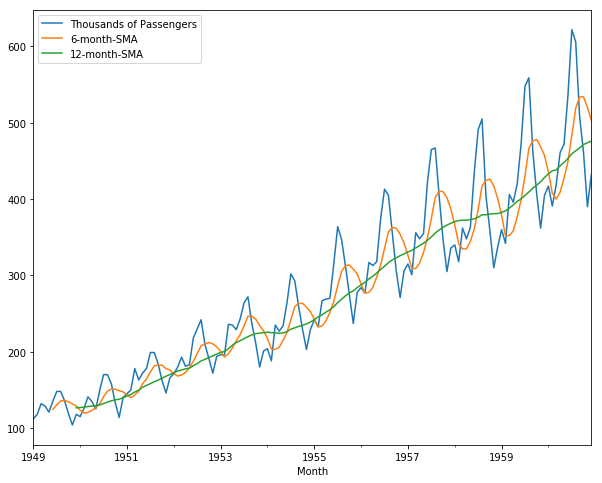

In [43]:
airline.plot(figsize=(10,8))

In [46]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

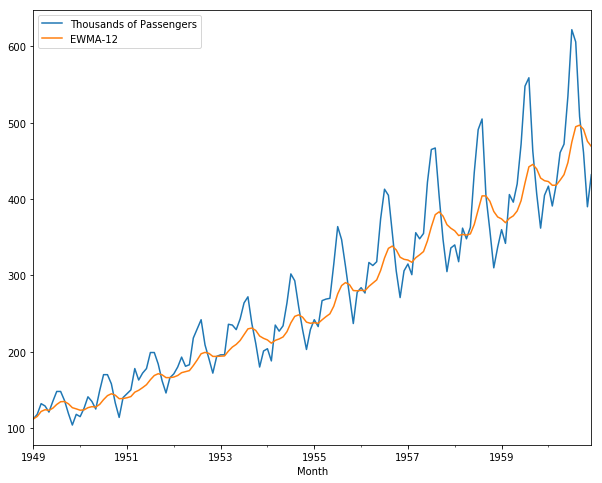

In [48]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8))

# ETS Decomposition

In [49]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA-12
Month,,,,
1949-01-01,112.0,NaN,NaN,112.000000
1949-02-01,118.0,NaN,NaN,115.250000
1949-03-01,132.0,NaN,NaN,121.787529
1949-04-01,129.0,NaN,NaN,124.064224
1949-05-01,121.0,NaN,NaN,123.231685


In [54]:
# airline.drop(airline[['6-month-SMA', '12-month-SMA','EWMA-12']], axis=1, inplace=True)

In [55]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


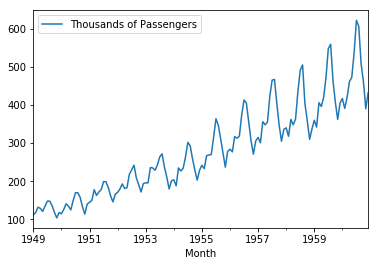

In [56]:
airline.plot()

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

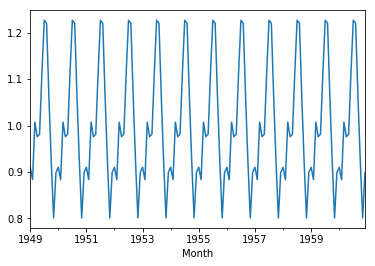

In [61]:
result.seasonal.plot()

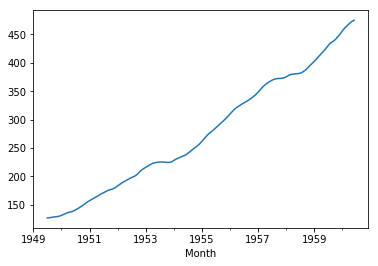

In [62]:
result.trend.plot()

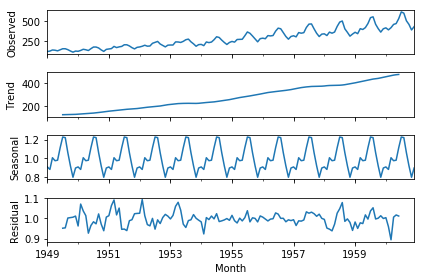

In [68]:
fig = result.plot()

# ARIMA Models

In [69]:
# ARIMA models often don't work well with historical stock data

# AutoRegressive Integrated Moving Average (ARIMA) model is a generalization of an autoregressive moving average (ARMA)

# model. Both ARIMA and ARMA are fitted to time series data either to better understand the data or to predict

# future points in the series (forecasting)

In [70]:
# ARIMA (Autoregeressive Integrated Moving Averages)

# Non-seasonal ARIMA
# Seasonal ARIMA

In [71]:
# Non seasonal ARIMA models are generally denoted ARIMA (p,d,q) where parameters
# p, d, q are non-negative integers

# AR (p): Autoregression
# A regression model that utilizes the dependent relationship between a current observation and
# observations over a previous period

In [72]:
# I (d): Integrated
# Differencing of observations (subtracting an observation from an observation at the previous time step)
# in order to make the time series stationary

In [73]:
# MA (q): Moving Average
# A model that uses the dependency between an observation and a residual error from a moving average
# model applied to lagged observations

# Stationary vs Non-Stationary Data

In [74]:
# To effectivly use ARIMA, we need to understand Stationary in our data.
# So what makes a data Stationary?
# A Stationary series has constant mean and variance over time

# A stationary data set will allow our model to predict that the mean and variance will be the same in the future periods


# Arima

### General process for ARIMA models is following:

##### Visulize the Time Series Data
##### Make the time series data stationary
##### Plot the Correlation and AutoCorrelation Charts
##### Construct the ARIMA model
#### Use the model to make predictions

In [76]:
import statsmodels.api as sm

In [77]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [78]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [80]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [81]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [82]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [83]:
df.drop(168, axis=0, inplace=True)

In [84]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [85]:
df['Month'] = pd.to_datetime(df['Month'])

In [86]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [87]:
df.set_index('Month', inplace=True)

In [88]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [89]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [92]:
df.describe() #.transpose()

,Milk in Pounds per Cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


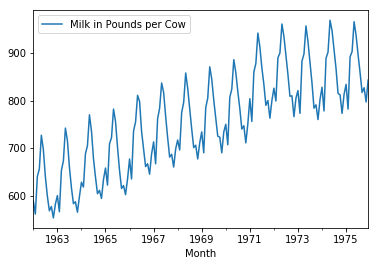

In [94]:
df.plot()

In [95]:
time_series = df['Milk in Pounds per Cow']

In [96]:
type(time_series)

pandas.core.series.Series

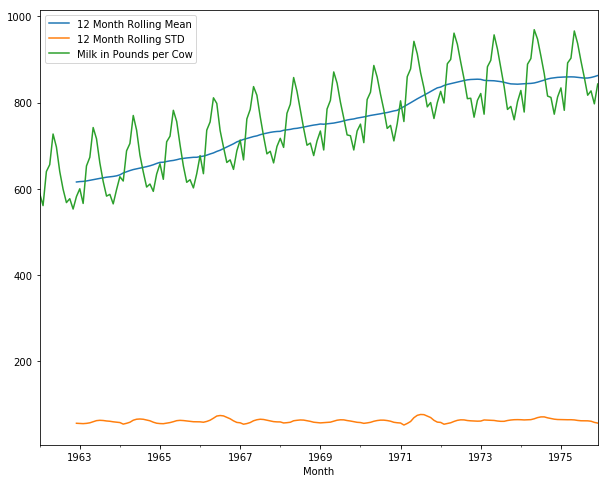

In [101]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean', figsize=(10,8))
time_series.rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot()
plt.legend()

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [103]:
decomp = seasonal_decompose(time_series)

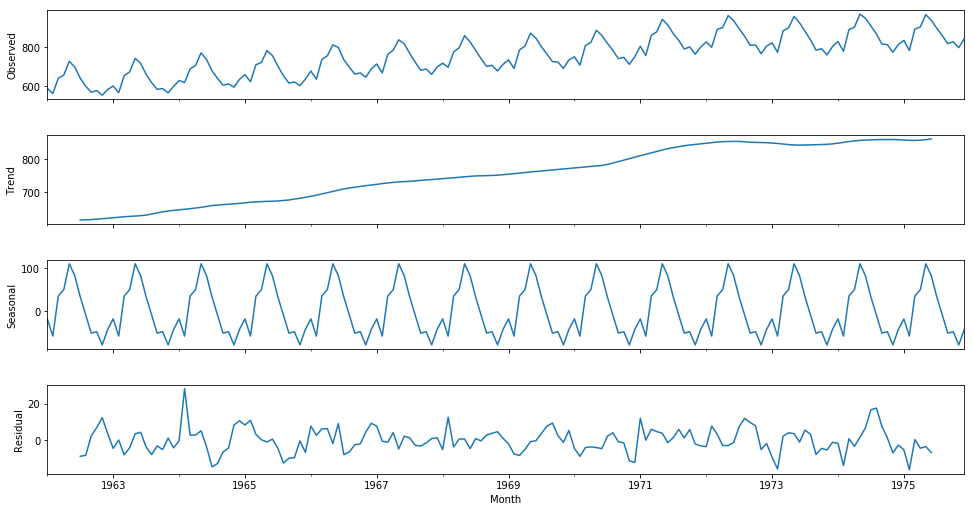

In [106]:
dec = decomp.plot()
dec.set_size_inches(15,8)

In [107]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
result = adfuller(df['Milk in Pounds per Cow'])

In [111]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observation used']
    
    for value,label in zip(result,labels):
        print(label + " : " + str(value))
    
    if result[1] <= 0.05:
        print("Strong evidence against Null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis")
        print("Fail to reject Null hypothesis")
        print("Data has a unit root, it is non stationary")

In [112]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky Fuller Test
ADF Test Statistic : -1.30381158742
p-value : 0.627426708603
# of lags : 13
Num of Observation used : 154
weak evidence against null hypothesis
Fail to reject Null hypothesis
Data has a unit root, it is non stationary


In [113]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df["Milk in Pounds per Cow"].shift(1)

In [114]:
df.head()

,Milk in Pounds per Cow,First Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0


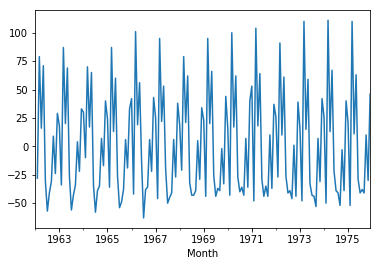

In [115]:
df['First Difference'].plot()

In [119]:
adf_check(df['First Difference'].dropna())

Augmented Dicky Fuller Test
ADF Test Statistic : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
Num of Observation used : 152
Strong evidence against Null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [120]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

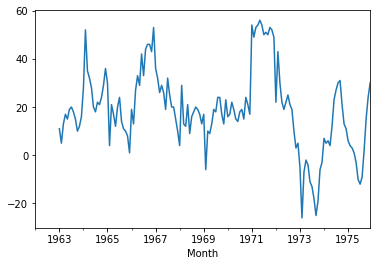

In [121]:
df['Seasonal Difference'].plot()

In [122]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky Fuller Test
ADF Test Statistic : -2.33541931436
p-value : 0.160798805277
# of lags : 12
Num of Observation used : 143
weak evidence against null hypothesis
Fail to reject Null hypothesis
Data has a unit root, it is non stationary


In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

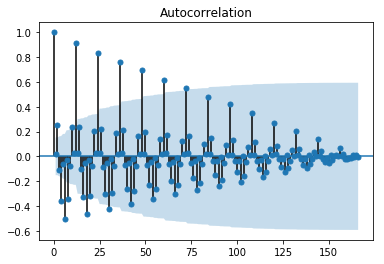

In [125]:
fig_first = plot_acf(df['First Difference'].dropna())

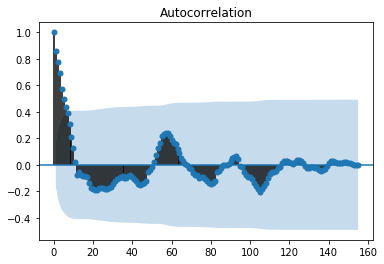

In [126]:
fig_seasonal_first = plot_acf(df['Seasonal Difference'].dropna())

In [127]:
from pandas.plotting import autocorrelation_plot

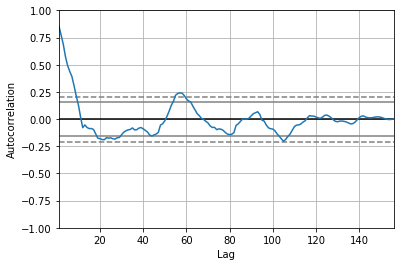

In [128]:
autocorrelation_plot(df['Seasonal Difference'].dropna())